In [84]:
import os
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import cross_val_score

In [85]:
def load_titanic_train_preprocessed():
    train_preprocessed = pd.read_csv(os.path.join('data', 'train_preprocessed.csv'))
    train_preprocessed_features = train_preprocessed.drop('Survived', axis=1)
    train_preprocessed_label = train_preprocessed['Survived']
    return train_preprocessed_features, train_preprocessed_label

In [86]:
def load_titanic_train_test_preprocessed():
    train_test_preprocessed = pd.read_csv(os.path.join('data', 'train_test_preprocessed.csv'))
    train_test_preprocessed_features = train_test_preprocessed.drop('Survived', axis=1)
    train_test_preprocessed_label = train_test_preprocessed['Survived']
    return train_test_preprocessed_features, train_test_preprocessed_label

In [87]:
X_train, y_train = load_titanic_train_preprocessed()
X_test, y_test = load_titanic_train_test_preprocessed()

# Train the model

In [88]:
def create_report(model, X, y):
    final_predictions = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y, final_predictions)
    plt.show()
    print("The test score is ", accuracy_score(y, final_predictions))
    print("The precision score is ", precision_score(y, final_predictions))
    print("The recall score is ", recall_score(y, final_predictions))
    print("The f1 score is ", f1_score(y, final_predictions))
    print(classification_report(y, final_predictions))

In [89]:
def correct_wrong_predicted_sets(model, X, y):
    final_predictions = model.predict(X)
    df = X.copy()
    df["Survived"] = y
    df["Predicted_Survived"] = final_predictions
    return df[df['Survived'] == df['Predicted_Survived']], df[df['Survived'] != df['Predicted_Survived']]

In [90]:
class_weights = {
    1: 0.6,
    0: 0.9
}

## LogisticRegression

In [91]:
lr_model = LogisticRegression(max_iter=1000, penalty="l2", class_weight=class_weights)
lr_model.fit(X_train, y_train)
print("The score of our model is ", lr_model.score(X_train, y_train))
cross_val_score(lr_model, X_train, y_train)

The score of our model is  0.8146067415730337


array([0.83216783, 0.85314685, 0.82394366, 0.77464789, 0.79577465])

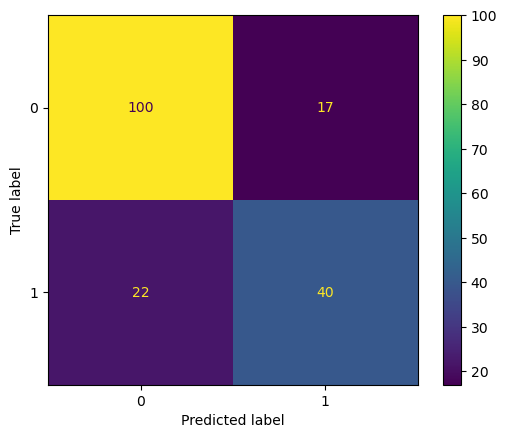

The test score is  0.7821229050279329
The precision score is  0.7017543859649122
The recall score is  0.6451612903225806
The f1 score is  0.6722689075630253
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       117
           1       0.70      0.65      0.67        62

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.78      0.78      0.78       179



In [92]:
create_report(lr_model, X_test, y_test)

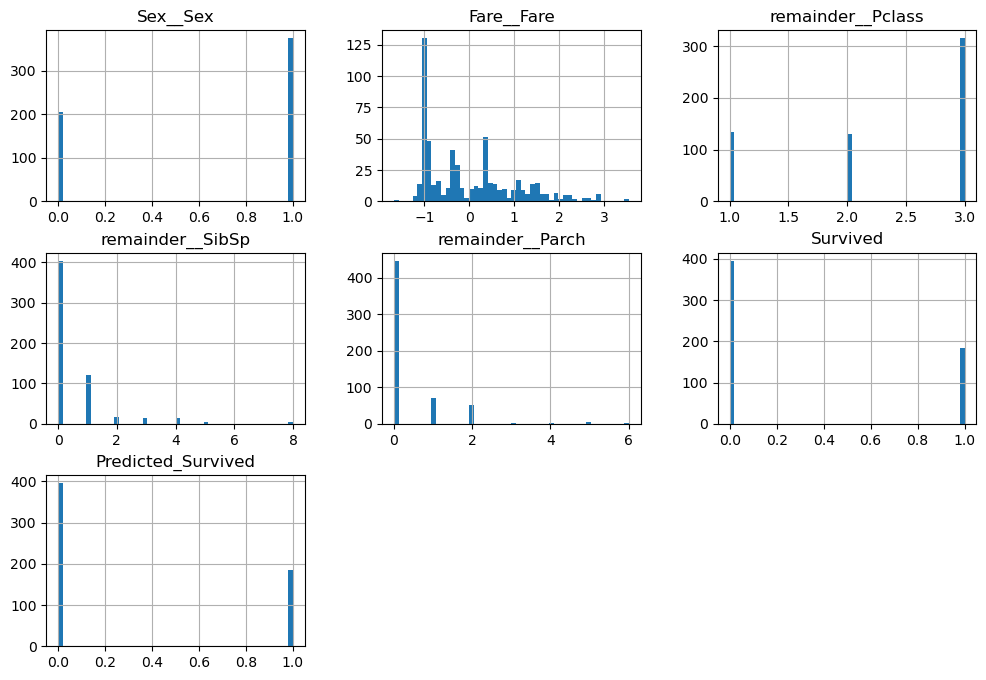

In [93]:
df_correct_predicted, df_wrong_predicted = correct_wrong_predicted_sets(lr_model, X_train, y_train)
df_correct_predicted.hist(bins=50, figsize=(12, 8))
plt.show()

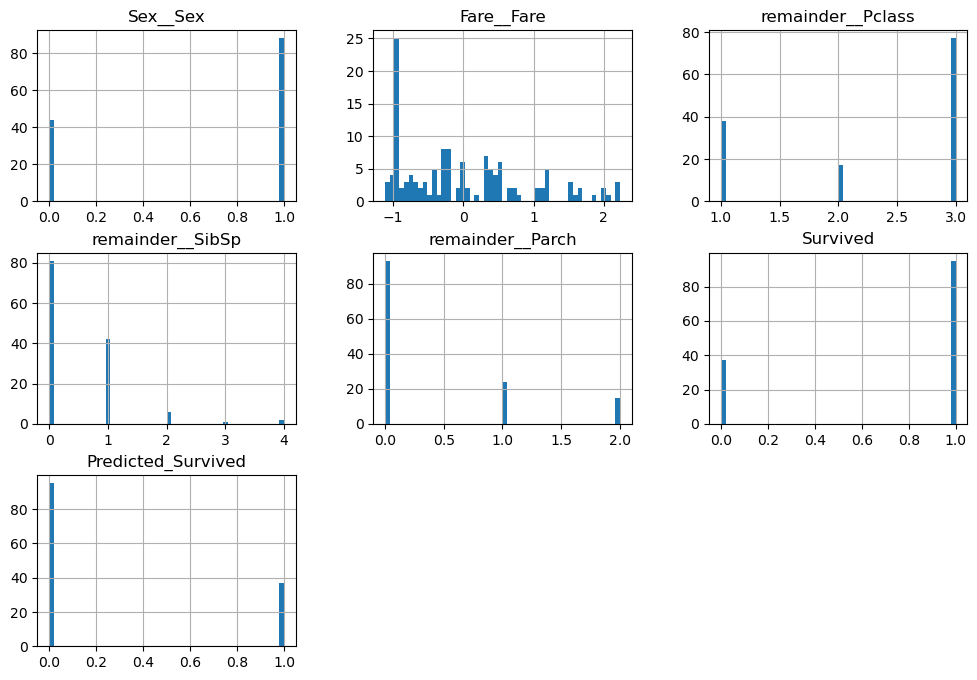

In [94]:
df_wrong_predicted.hist(bins=50, figsize=(12, 8))
plt.show()

## SGDClassifier

In [95]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
print("The score of our model is ", sgd_model.score(X_train, y_train))
cross_val_score(sgd_model, X_train, y_train)

The score of our model is  0.7907303370786517


array([0.71328671, 0.81118881, 0.80985915, 0.75352113, 0.76056338])

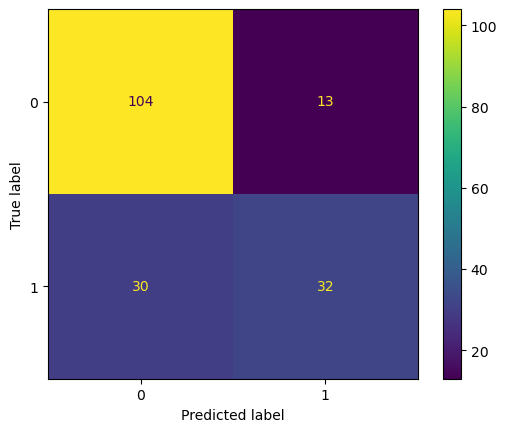

The test score is  0.7597765363128491
The precision score is  0.7111111111111111
The recall score is  0.5161290322580645
The f1 score is  0.5981308411214953
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       117
           1       0.71      0.52      0.60        62

    accuracy                           0.76       179
   macro avg       0.74      0.70      0.71       179
weighted avg       0.75      0.76      0.75       179



In [96]:
create_report(sgd_model, X_test, y_test)

## Decision Tree

In [97]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=2)
dt_model.fit(X_train, y_train)
print("The score of our model is ", dt_model.score(X_train, y_train))
cross_val_score(dt_model, X_train, y_train)

The score of our model is  0.7921348314606742


array([0.7972028 , 0.83216783, 0.8028169 , 0.76056338, 0.76760563])

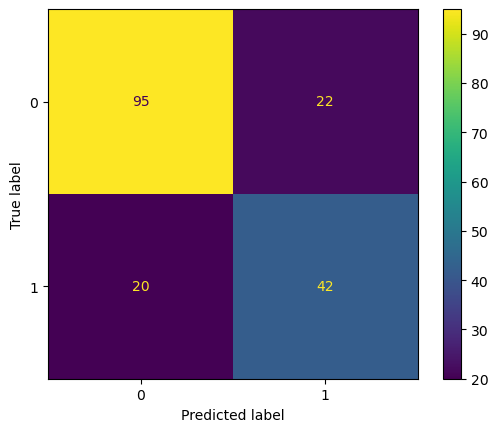

The test score is  0.7653631284916201
The precision score is  0.65625
The recall score is  0.6774193548387096
The f1 score is  0.6666666666666667
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       117
           1       0.66      0.68      0.67        62

    accuracy                           0.77       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.77      0.77      0.77       179



In [98]:
create_report(dt_model, X_test, y_test)

## Random Forest Classifier

In [99]:
random_forest = RandomForestClassifier(class_weight=class_weights)
random_forest.fit(X_train, y_train)
print("The score of our model is ", random_forest.score(X_train, y_train))
cross_val_score(random_forest, X_train, y_train)

The score of our model is  0.9241573033707865


array([0.81118881, 0.84615385, 0.87323944, 0.77464789, 0.77464789])

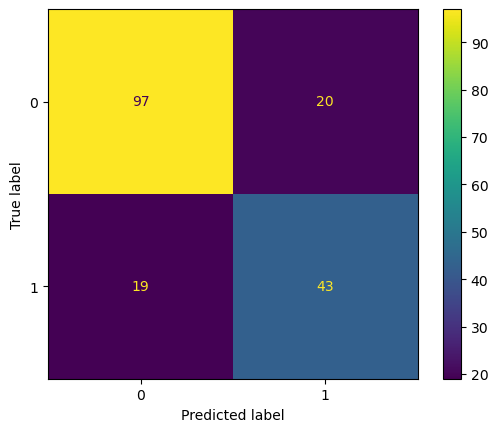

The test score is  0.7821229050279329
The precision score is  0.6825396825396826
The recall score is  0.6935483870967742
The f1 score is  0.6880000000000001
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       117
           1       0.68      0.69      0.69        62

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [100]:
create_report(random_forest, X_test, y_test)

## SVM

In [101]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("The score of our model is ", svm_model.score(X_train, y_train))
cross_val_score(svm_model, X_train, y_train)

The score of our model is  0.8174157303370787


array([0.83216783, 0.84615385, 0.81690141, 0.77464789, 0.78873239])

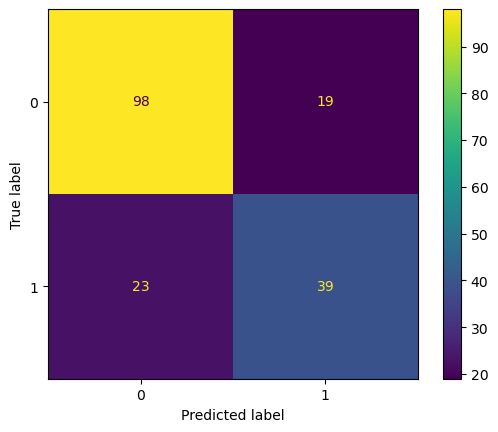

The test score is  0.7653631284916201
The precision score is  0.6724137931034483
The recall score is  0.6290322580645161
The f1 score is  0.6499999999999999
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       117
           1       0.67      0.63      0.65        62

    accuracy                           0.77       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



In [102]:
create_report(svm_model, X_test, y_test)

# Ensemble learning technique

## XGBoost

In [103]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
print("The score of our model is ", xgb_model.score(X_train, y_train))
cross_val_score(xgb_model, X_train, y_train)

The score of our model is  0.9129213483146067


array([0.81818182, 0.83216783, 0.85915493, 0.78873239, 0.78873239])

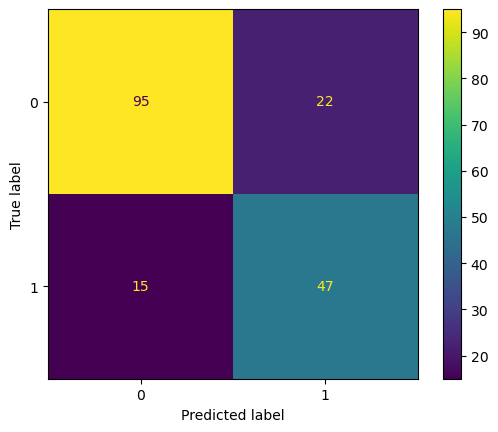

The test score is  0.7932960893854749
The precision score is  0.6811594202898551
The recall score is  0.7580645161290323
The f1 score is  0.7175572519083969
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       117
           1       0.68      0.76      0.72        62

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



In [104]:
create_report(xgb_model, X_test, y_test)

## Stacking

In [105]:
base_estimators = [
    ('lr', lr_model),
    ('sgd', sgd_model),
    ('dt', dt_model)
]

ensemble_model = StackingClassifier(estimators=base_estimators)
ensemble_model.fit(X_train, y_train)
print("The score of our model is ", ensemble_model.score(X_train, y_train))
cross_val_score(ensemble_model, X_train, y_train)

The score of our model is  0.8089887640449438


array([0.79020979, 0.85314685, 0.81690141, 0.76760563, 0.76760563])

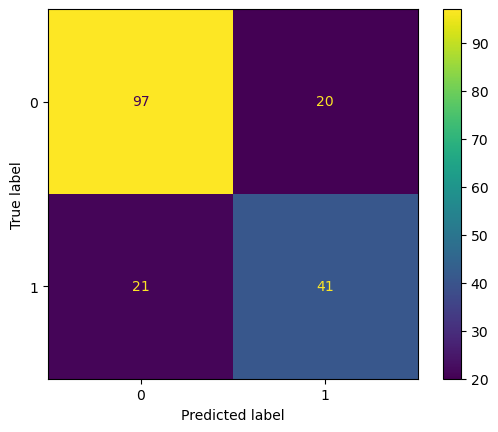

The test score is  0.770949720670391
The precision score is  0.6721311475409836
The recall score is  0.6612903225806451
The f1 score is  0.6666666666666666
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       117
           1       0.67      0.66      0.67        62

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [106]:
create_report(ensemble_model, X_test, y_test)

## Bagging

In [107]:
bagging_classifier = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0)
bagging_classifier.fit(X_train, y_train)
print("The score of our model is ", bagging_classifier.score(X_train, y_train))
cross_val_score(bagging_classifier, X_train, y_train)

The score of our model is  0.8103932584269663


array([0.83216783, 0.84615385, 0.82394366, 0.78169014, 0.78873239])

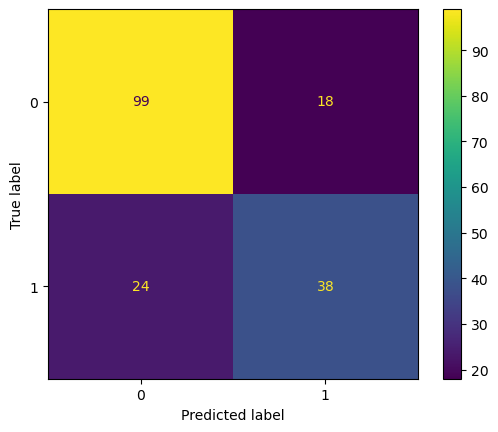

The test score is  0.7653631284916201
The precision score is  0.6785714285714286
The recall score is  0.6129032258064516
The f1 score is  0.6440677966101694
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       117
           1       0.68      0.61      0.64        62

    accuracy                           0.77       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.76      0.77      0.76       179



In [108]:
create_report(bagging_classifier, X_test, y_test)

# Create result for Kaggle

In [109]:
def load_titanic_test_preprocessed():
    test_preprocessed = pd.read_csv(os.path.join('data', 'test_preprocessed.csv'))
    test_preprocessed_features = test_preprocessed.drop('PassengerId', axis=1)
    test_preprocessed_label = test_preprocessed['PassengerId']
    return test_preprocessed_features, test_preprocessed_label

X_final, x_final_passenger_id = load_titanic_test_preprocessed()

random_forest.fit(X_test, y_test)
y_final = random_forest.predict(X_final)

df_final = pd.DataFrame(x_final_passenger_id)
df_final["Survived"] = y_final

filepath = Path('result.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_final.to_csv(filepath, index=False)